In [51]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
import pandas as pd
from sqlalchemy.orm import Session
import matplotlib
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
stations = Base.classes.station
measurements = Base.classes.measurement

In [7]:
session = Session(engine)

In [13]:
rain = session.query(measurements.date, measurements.prcp).filter(measurements.date > ('2016-08-23'))

In [14]:
rain_dict = []
for row in rain:
      rain_dict.append({'date': row[0], 'prcp': row[1]})

In [26]:
rain_df = pd.DataFrame(rain_dict)

In [28]:
type(rain_df)

pandas.core.frame.DataFrame

In [30]:
rain_df = rain_df.fillna(0)

In [32]:
rain_df.sort_values('date').head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,0.00
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [33]:
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


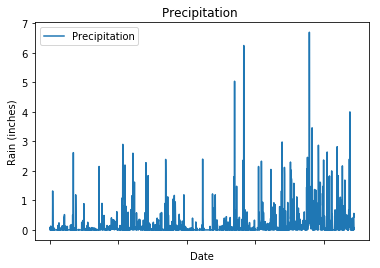

In [47]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain (inches)")
plt.title("Precipitation ")
plt.legend(["Precipitation"])
plt.show()

In [50]:
locations = session.query(measurements).group_by(measurements.station).count()
print(locations)

9


In [59]:
station_activity = session.query(measurements.station, func.count(measurements.tobs)).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()

most_obs = station_activity[0][0] 


print(station_activity)
print(most_obs)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [62]:
temperature = session.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.station == most_obs).\
    filter(measurements.date > ('2016-08-23')).\
    order_by(measurements.date).all()


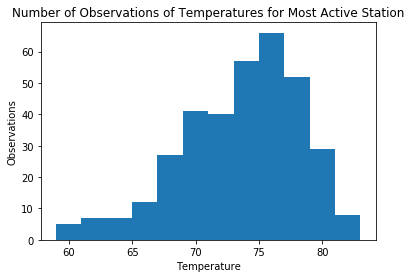

In [67]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("Number of Observations of Temperatures for Most Active Station")
plt.show()

In [78]:
def calc_temps(begin, end):
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
    filter(measurements.date >= begin).filter(measurements.date <= end).all()
    
temps = (calc_temps('2013-01-01', '2014-01-01'))
print(temps)

[(53, 72.6696562032885, 86)]


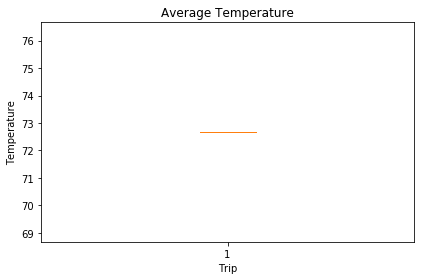

In [101]:
fig, ax = plt.subplots()
x = int(temps[0][1])


ax.boxplot(temps[0][1])

ax.set_title('Average Temperature')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()

plt.show()